### **Evidencia de Aprendizaje 1 - Creación de una base de datos analítica**

Maycol Alejandro Vasquez Casas

BigData

Grupo 61


### **Problema**

La diabetes es una enfermedad crónica que tiene un alto impacto en la salud pública, su detección temprana y prevención efectica es fundamental para reducir futuras complicaciones y los altos costos sanitarios. Sin embargo, los sistemas de diagnostico tradionales sueles ser reactivos, fragmentados y poco personalizados.

El conjunto de datos de indicadores de salud para la diabetes, responde a esta necesidad, ya que ofrece una base sólida y multidimensional, con variables demográficas, clinicas y de estilo de vida, que permite modelar el riesgo de desarrollar diabetes tipo 2 en diversas poblaciones.

Este recurso es valioso, ya que ayuda a profesionales de la salud y epidemiólogos, que requieren herramientas predictivas para identificar pacientes en riesgo antes de que se presenten los síntomas clinicos, tambien es útil para investigadores en salud pública, que buscan entender patrones poblacionales y diseñar estrategias de intervención basadas en evidencias. Tambien es importante para desarrolladores de modelos de machig learning, que necesitan datos limpios, consistentes y clinicamente validos para entrenar algoritmos confiables.

### **Dataset**

**Nombre:** Health & Lifestyle Data for Diabetes Prediction

**Autor:** Alam Shihab

**Descripción:** Cada registro de este conjunto de datos refleja el perfil de salud de un individuo, combinando atributos demográficos, hábitos de vida, antecedentes médicos familiares y mediciones fisiológicas. Las variables simulan distribuciones médicas realistas derivadas de investigaciones en salud pública, manteniendo la privacidad y preservando la validez analítica.

[Link al Dataset](https://www.kaggle.com/datasets/alamshihab075/health-and-lifestyle-data-for-diabetes-prediction)


El data set fue seleccionado, porque el conjunto de datos de indicadores de salud para la diabetes representa una fuente confiable, completa y clínicamente validada para abordar un problema de alto impacto: la predicción y prevención de la diabetes tipo 2.

###**Variables relevantes**

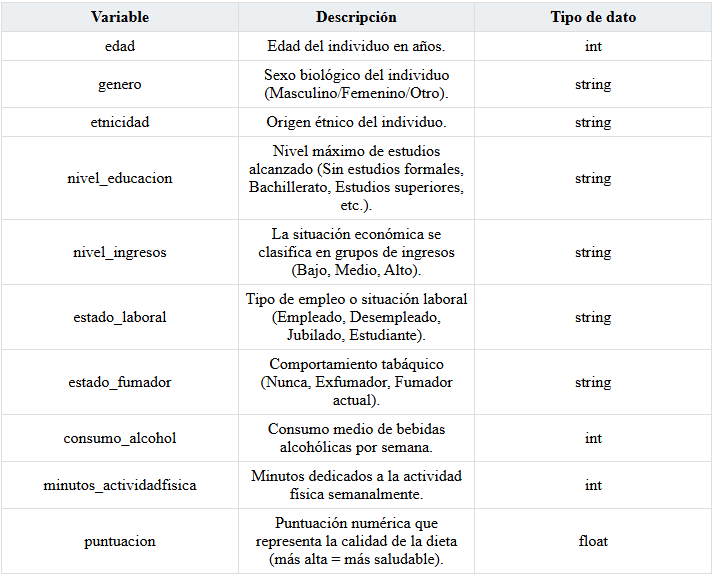





### **Modelo entidad–relación (ERD)**

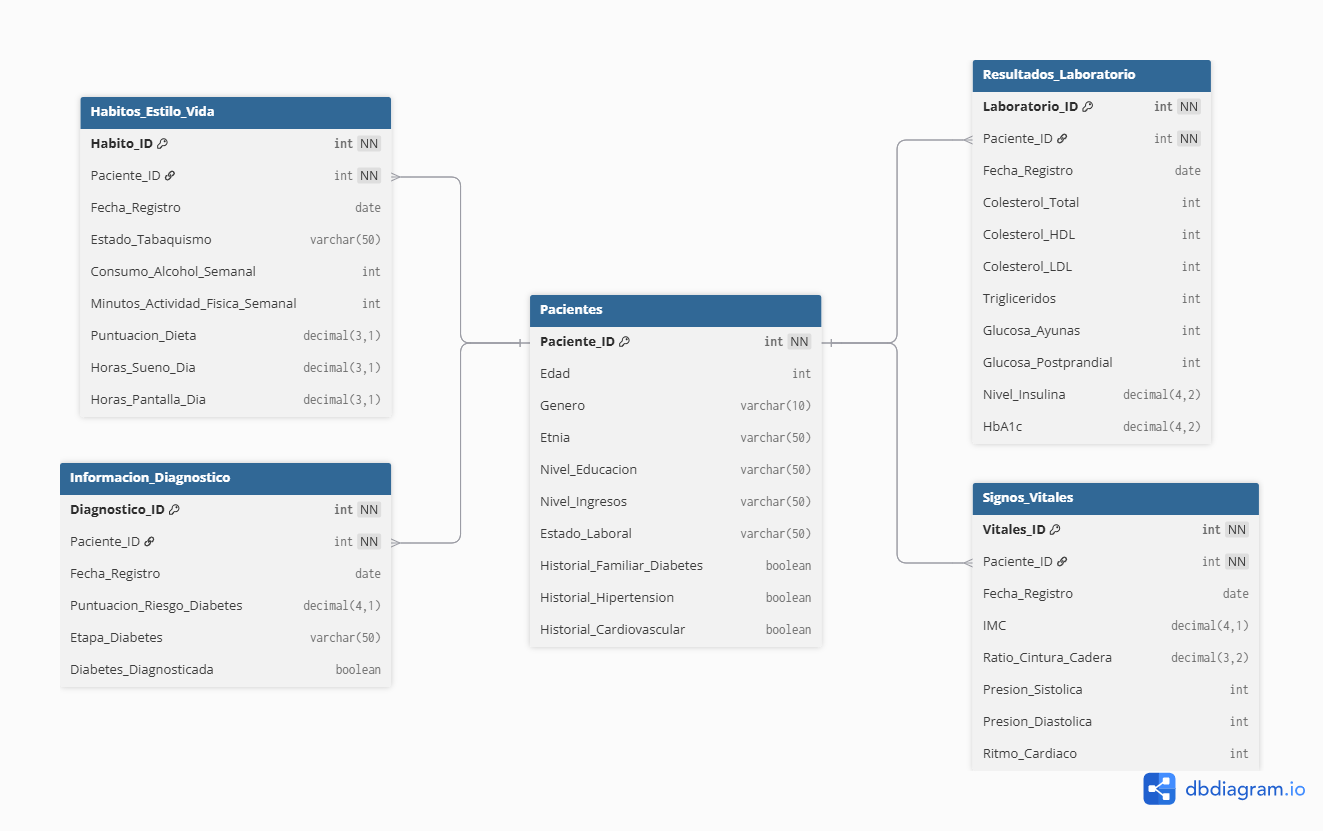

Link a gráfico: https://dbdiagram.io/d/690ecad26735e11170d17020

In [ ]:
!pip install colabcode

Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this version.
INFO: pip is looking at multiple versions of colabcode to determine which version is compatible with other requirements. This could take a while.
  Using cached uvicorn-0.13.1-py3-none-any.whl.metadata (4.6 kB)
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this versio

In [4]:
import sqlite3
import pandas as pd

In [6]:
#from colabcode import ColabCode
import os
import kagglehub

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/IUDIGITAL/Ingeniería de software y datos/Semestre 1/Bloque 2/Big Data/Actividad_1/src/static_csv/Diabetes_and_LifeStyle_Dataset.csv',delimiter=',')

# **Validación de carga de datos**

In [15]:
df.head(4)

,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,52,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1


## **Creación de tablas**





In [19]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('diabetes_database.db')
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Patients (
        Patient_ID INTEGER PRIMARY KEY UNIQUE NOT NULL,
        Age INTEGER,
        gender VARCHAR(10),
        ethnicity VARCHAR(50),
        education_level VARCHAR(50),
        income_level VARCHAR(50),
        employment_status VARCHAR(50),
        family_history_diabetes BOOLEAN,
        hypertension_history BOOLEAN,
        cardiovascular_history BOOLEAN
    )
''')

conn.commit()

In [20]:
patients_df = df[['Age', 'gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']].copy()

# Add a Patient_ID column (assuming a simple sequential ID for this example)
patients_df['Patient_ID'] = patients_df.index + 1

# Reorder columns to match the table schema
patients_df = patients_df[['Patient_ID', 'Age', 'gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']]

# Insert data into the Patients table
patients_df.to_sql('Patients', conn, if_exists='replace', index=False) # Use 'replace' to overwrite if table exists

conn.commit()
conn.close()

print("La tabla ha sido creada correctamente.")

La tabla ha sido creada correctamente.


In [21]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('diabetes_database.db')
cursor = conn.cursor()

cursor.execute("SELECT * FROM Patients LIMIT 10")
rows = cursor.fetchall()

# Get column names from cursor description
column_names = [description[0] for description in cursor.description]

# Create a pandas DataFrame for better display
result_df = pd.DataFrame(rows, columns=column_names)

display(result_df)

conn.close()

,Patient_ID,Age,gender,ethnicity,education_level,income_level,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,1,58,Male,Asian,Highschool,Lower-Middle,Employed,0,0,0
1,2,52,Female,White,Highschool,Middle,Employed,0,0,0
2,3,60,Male,Hispanic,Highschool,Middle,Unemployed,1,0,0
3,4,74,Female,Black,Highschool,Low,Retired,0,0,0
4,5,46,Male,White,Graduate,Middle,Retired,0,0,0
5,6,46,Female,White,Highschool,Upper-Middle,Employed,0,0,0
6,7,75,Female,White,Graduate,Upper-Middle,Retired,0,1,0
7,8,62,Male,White,Postgraduate,Middle,Unemployed,0,1,1
8,9,37,Male,Black,Highschool,Lower-Middle,Employed,0,0,1
9,10,59,Female,White,Graduate,Middle,Employed,0,0,0


## **Consulta SQL**

In [22]:
import sqlite3

conn = sqlite3.connect('diabetes_database.db')
cursor = conn.cursor()

cursor.execute("SELECT COUNT(*) FROM Patients")
count = cursor.fetchone()[0]

print(f"El número de pacientes registrados en la tabla es de: {count}")

conn.close()

El número de pacientes registrados en la tabla es de: 97297


## **Nombre y tipos de columnas**

In [23]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('diabetes_database.db')
cursor = conn.cursor()

cursor.execute("PRAGMA table_info(Patients)")
table_info = cursor.fetchall()

# Get column names for the PRAGMA output
pragma_column_names = [description[0] for description in cursor.description]

# Create a pandas DataFrame for better display of table info
table_info_df = pd.DataFrame(table_info, columns=pragma_column_names)

display(table_info_df)

conn.close()

,cid,name,type,notnull,dflt_value,pk
0,0,Patient_ID,INTEGER,0,None,0
1,1,Age,INTEGER,0,None,0
2,2,gender,TEXT,0,None,0
3,3,ethnicity,TEXT,0,None,0
4,4,education_level,TEXT,0,None,0
5,5,income_level,TEXT,0,None,0
6,6,employment_status,TEXT,0,None,0
7,7,family_history_diabetes,INTEGER,0,None,0
8,8,hypertension_history,INTEGER,0,None,0
9,9,cardiovascular_history,INTEGER,0,None,0


En el resultado de la consulta se puede visualizar la estructura de la tabla pacientes, se puede ver que tiene 10 columnascompuestos por datos de tipo INT y tipo Text o String.

## Consulta con filtro

In [24]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('diabetes_database.db')
cursor = conn.cursor()

# Example query to filter by gender
cursor.execute("SELECT * FROM Patients WHERE gender = 'Female' LIMIT 10")
filtered_patients = cursor.fetchall()

# Get column names from cursor description
column_names = [description[0] for description in cursor.description]

# Create a pandas DataFrame for better display
filtered_patients_df = pd.DataFrame(filtered_patients, columns=column_names)

display(filtered_patients_df)

conn.close()

,Patient_ID,Age,gender,ethnicity,education_level,income_level,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,2,52,Female,White,Highschool,Middle,Employed,0,0,0
1,4,74,Female,Black,Highschool,Low,Retired,0,0,0
2,6,46,Female,White,Highschool,Upper-Middle,Employed,0,0,0
3,7,75,Female,White,Graduate,Upper-Middle,Retired,0,1,0
4,10,59,Female,White,Graduate,Middle,Employed,0,0,0
5,11,43,Female,White,Highschool,Middle,Employed,0,0,0
6,12,43,Female,White,Highschool,Middle,Employed,0,1,0
7,13,54,Female,White,Highschool,Middle,Employed,0,0,0
8,18,55,Female,Black,Graduate,Lower-Middle,Retired,0,0,0
9,22,46,Female,Black,Highschool,Middle,Unemployed,0,0,0


En la consulta se puede ver los primeros 10 registros de la tabla filtrado por genero, en este caso femenino.